%run?
# Finite Markov Decision Processes
MDPs are a classical formalization of sequential decision-making. They can handle not only immediate rewards but also rewards that are received at a later stage of the process. Differently from the bandit problems, in MDPs we estimate the value of $q_*(s,a)$, which is the expected return starting from state $s$, taking action $a$ that is, now the action's value also depends on the state $s$ of the system. The optimal value function $v_*(s)$ of a state, is the maximum value function over all policies.

MDPs define the learning problem as the continued interation of an agent and its environment.

<img src="Reinforcement_learning_diagram.png" alt= "Agent-Environment interaction" width="400" height="400">

As part of the interactions the agent receives a reward and observes the next state of the environment. So for every time step $t$, the agent receives the state $S_t \in \cal{S}$, takes an action $A_t \in \cal{A}(s)$ and receives a numerical reward $R_{t+1} \in \cal{R} \subset{\mathbb{R}}$ in the next step as a consequence. So the process generates the following seguence:

$$S_0 , A_0 , R_1 , S_1 , A_1 , R_2 , S_2 , A_2 , R_3 ,\ldots$$

In a finite MDP, the sets of states, actions and rewards ($\cal{S}$, $\cal{A}$, $\cal{R}$) are all finite. The dynamics of the MDP are given by the state-transition probabilities $$p(s',r|s,a) = Pr\{S_t=s',R_t=r|S_{t-1}=s,A_{t-1}=a\},$$ which are the probabilities of the next state $s'$ and next reward $r$ given the current state $s$ and action $a$. The state-transition probabilities completely characterize any finite MDP.

The  expected rewards for state-action pairs are defined as:
\begin{equation}
r(s,a) = \mathbb{E}[R_{t+1}|S_t=s,A_t=a] = \sum_{r \in \cal{R}} r \sum_{s' \in \cal{S}} p(s',r|s,a)
\end{equation}

We define the environment as everything that is beyond the agent's control.

## Goals and Rewards
The  goal of the agent is to maximize the total amount of reward it receives. The agent does not care about the immediate reward only, but also about the long-term rewards. Using a reward signal to represent the goal is a fundamental feature of reinforcement learning.

### Episodes and Continuing Tasks
Some learning tasks can be structure in the form of episodes, where the total reward of each episode, denoted $G_T$, is defined as the sum of the rewards up to the last time step $T$:

$$G_t = R_{t+1} + R_{t+2} + \ldots + R_T$$

this type of tasks are called *episodic tasks*. In other tasks, the agent-environment interaction does not break naturally into identifiable episodes, but goes on continually without limit. These are called *continuing tasks*. In these tasks where $T=\infty$ the total reward may also be infinite. To make it easier to talk about these tasks, we define the *discounted return* at time step $t$ as:

$$G_t = R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + \ldots = \sum_{k=0}^{\infty} \gamma^k R_{t+k+1}$$

where $\gamma$ is a parameter, $0 \leq \gamma \leq 1$, called the *discount rate*. The discount rate determines the present value of future rewards: a reward received $k$ time steps in the future is worth only $\gamma^{k-1}$ times what it would be worth if it were received immediately. The present value of future rewards is called the *return*. The value of receiving reward $R$ after $k+1$ time steps is $\gamma^k R$. If $\gamma < 1$, the infinite sum has a finite value whenever the rewards are bounded. If $\gamma = 0$, the agent is myopic, it only cares about the immediate reward. If $\gamma = 1$, the agent cares about the entire future trajectory of rewards.

## Policies and Value Functions
A policy is a mapping from states to probabilities of selecting each possible action. If the agent is following policy $\pi$ at time $t$, then $\pi(a|s)$ is the probability that $A_t=a$ if $S_t=s$. If the state and action spaces are finite, then a policy can be described by a matrix $\pi$ where each entry $\pi(s,a)$ is the probability of taking action $a$ in state $s$. The set of all policies is denoted $\Pi$.

The value function of a state $s$ under a policy $\pi$, denoted $v_{\pi}(s)$, is the expected return when starting in $s$ and following $\pi$ thereafter. For MDPs, we can define the value function for state-action pairs as well. The value function of state-action pair $(s,a)$ under a policy $\pi$, denoted $q_{\pi}(s,a)$, is the expected return starting from $s$, taking action $a$ and thereafter following policy $\pi$. The value functions are defined as:

\begin{align}
v_{\pi}(s) &= \mathbb{E}_{\pi}[G_t|S_t=s] \\
&= \mathbb{E}_{\pi}\left[\sum_{k=0}^{\infty} \gamma^k R_{t+k+1} | S_t=s\right], \, \forall s \in \cal{S} \\
q_{\pi}(s,a) &= \mathbb{E}_{\pi}[G_t|S_t=s,A_t=a]\\
&= \mathbb{E}_{\pi}\left[\sum_{k=0}^{\infty} \gamma^k R_{t+k+1} | S_t=s, A_t=a\right], \, \forall s \in \cal{S}, a \in \cal{A}(s)
\end{align}

where $\mathbb{E}_{\pi}$ denotes the expected value of a random variable given that the agent follows policy $\pi$. The value functions are specific to the policy $\pi$, so we can also write them as $v_{\pi}(s)$ and $q_{\pi}(s,a)$.

### Bellman Equation
The  Bellman equation expresses the relationship between the value of a state and the values of its successor states. The Bellman equation for $v_{\pi}$ is:
\begin{equation}
v_{\pi}(s) = \sum_{a \in \cal{A}(s)} \pi(a|s) \sum_{s' \in \cal{S}} p(s',r|s,a) \left[r + \gamma v_{\pi}(s')\right], \, \forall s \in \cal{S}
\end{equation}

The Bellman equation averages over all possible next states $s'$ and rewards $r$ that can follow from state $s$ and action $a$ weighing them by the probability of their occurence.

**Example 3.5: Gridworld**

In [3]:
import os
os.chdir('../Code/Sutton_Barto/chapter03')

In [4]:
%run grid_world.py

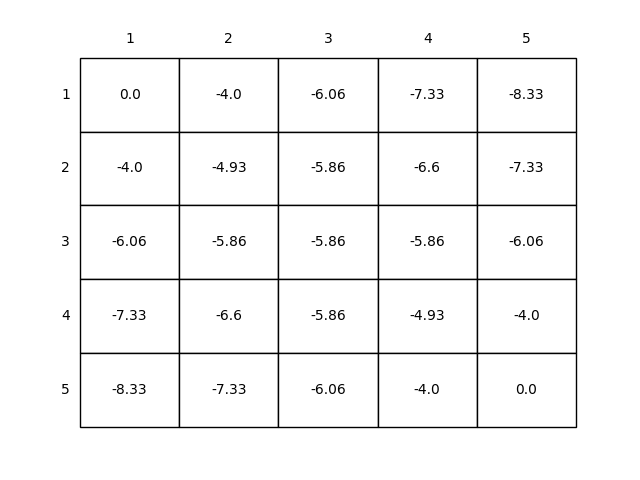

In [15]:
from IPython.display import Image, display
display(Image(filename='../images/figure_4_1.png', embed=True, width=400))

### Optimal Policies and Optimal Value Functions
Solving an MDP means finding an **optimal policy** $\pi$ that maximizes the value function for all states
That is, we call an optimal policy $\pi > \pi'$, if and only if $v_{\pi}(s)\ge v_{\pi'}(s),\, \forall s \in \cal{S}$. The optimal state-value function is denoted $v_* = \underset{\pi}{max}v_{\pi}(s)$ and the optimal action-value function is denoted $q_*= \underset{\pi}{max}q_{\pi}(s,a)$. We can also write $q_*$ in terms of $v_*$ as:

\begin{equation}
q_*(s,a) = \mathbb{E}[R_{t+1} + \gamma v_*(S_{t+1})|S_t=s,A_t=a]
\end{equation}

Because $v_*$ is the optimal value function, it must satisfy the Bellman equation for the optimal policy and can be written without reference to any specific policy as:

\begin{equation}
v_*(s) = \underset{a}{max} \sum_{s' \in \cal{S}} p(s',r|s,a) \left[r + \gamma v_*(s')\right], \, \forall s \in \cal{S}
\end{equation}

**Example 3.8: Solving the Gridworld**
Solve the gridworld problem as specified in page 65 of the book. Plot the result as a vectorfield.